In [1]:
key = '10W1vbE6BODoqgTymWC5BQcEemkdAAxsD'
key_img = '1WWeVVvAzMhitL8-COVs4qoKmrwjBXC9a'

In [2]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    return save_response_content(response, destination)[0] 

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    x = []
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                x.append(chunk)
    return x

In [3]:
values = download_file_from_google_drive(key_img, '../test-files/model-yolo-upload.h5')

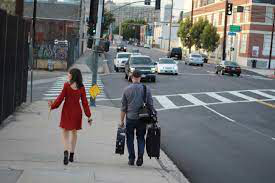

In [4]:
from PIL import Image
import io

image_data = values

image = Image.open(io.BytesIO(image_data))
image

In [5]:
values2 = download_file_from_google_drive(key, '../test-files/model-yolo-upload.h5')

In [6]:
type(values2)

bytes

In [7]:
import h5py

In [8]:
f = io.BytesIO(values2)
h = h5py.File(f,'r')

OSError: Unable to open file (truncated file: eof = 32768, sblock->base_addr = 0, stored_eof = 248686624)